## Linear regression with scikit-learn (OLS)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn import linear_model, datasets, metrics, model_selection


We load the boston house-prices dataset and `X` are our features and `y` is the target variable `medv` (Median value of owner-occupied homes in $1000s).

In [2]:
boston = datasets.load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

Let's describe our features to see whta kind of type we have. Note `chas` is a dummy variable.

In [4]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


Let's plot the the target variable

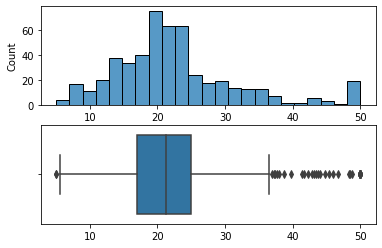

In [5]:
fig, axs = plt.subplots(nrows=2)
_ = sns.histplot(x=y, ax=axs[0])
_ = sns.boxplot(x=y, ax=axs[1])


Let's plot the features

In [ ]:
sns.pairplot(X);

Split the data into train and test set

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.7)

print('train samples:', len(X_train))
print('test samples', len(X_test))


Fit the model with the training data

In [ ]:
lr = linear_model.LinearRegression().fit(X_train, y_train)

Let's print the model parameters (intercept and coefficients)

In [ ]:
print('No coef:', len(lr.coef_))
print('Coefficients: \n', lr.coef_)
print('Intercept:', lr.intercept_)

Print the predicated values against the the true values. Perfect match should lie be on the red line.

In [ ]:
predicted = lr.predict(X_test)

fig, ax = plt.subplots()
ax.scatter(y_test, predicted)

ax.set_xlabel('True Values')
ax.set_ylabel('Predicted')
_ = ax.plot([0, y.max()], [0, y.max()], ls='-', color='red')


Residual plot for our test set

In [ ]:
residual = y_test - predicted

fig, ax = plt.subplots()
ax.scatter(y_test, residual)
ax.set_xlabel('y')
ax.set_ylabel('residual')

_ = plt.axhline(0, color='red', ls='--')

In [ ]:
sns.displot(residual, kind="kde");

The trainig scores

In [ ]:
print("r2 score: {}".format(metrics.r2_score(y_test, predicted)))
print("mse: {}".format(metrics.mean_squared_error(y_test, predicted)))
print("rmse: {}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))